In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2019.csv')

In [3]:
print(data.shape)
data.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
data.drop(columns=['Overall rank', 'Country or region'], inplace=True)

In [5]:
y = data['Score']
X = data.drop(columns=['Score'])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numerical_features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
numerical_transforer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transforer, numerical_features)
        ])

pre = Pipeline(steps=[('preprocessor', preprocessor)])


X_train = pd.DataFrame(pre.fit_transform(X_train), columns=numerical_features)
X_test = pd.DataFrame(pre.transform(X_test), columns=numerical_features)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
r = Ridge(alpha=2)
l = Lasso(alpha=2)
en = ElasticNet()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [9]:
lr.fit(X_train, y_train)
r.fit(X_train, y_train)
l.fit(X_train, y_train)
en.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
from sklearn.metrics import r2_score

print('lr', r2_score(lr.predict(X_test), y_test))
print('r', r2_score(r.predict(X_test), y_test))
print('l', r2_score(l.predict(X_test), y_test))
print('en', r2_score(en.predict(X_test), y_test))
print('dtr', r2_score(dtr.predict(X_test), y_test))
print('rfr', r2_score(rfr.predict(X_test), y_test))

lr 0.7201560018599977
r 0.6237182998601256
l 0.0
en 0.0
dtr 0.6316487909439912
rfr 0.6569090396145074


In [11]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfr)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

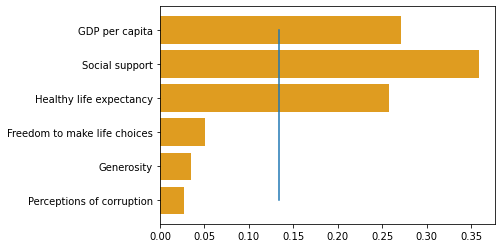

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax=sns.barplot(y=X_train.columns, x=rfr.feature_importances_, color='orange')
ax.plot(0.8*np.mean(rfr.feature_importances_)*np.ones(len(rfr.feature_importances_)), X_train.columns)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

search_space = {
      "fit_intercept": [True, False],
      "copy_X": [True, False],
      "normalize": [True, False]
      }

In [14]:
grid = GridSearchCV(estimator=LinearRegression(), 
                    param_grid=search_space,
                    cv=3,
                    scoring='r2', 
                    return_train_score=True,
                    n_jobs=-1,
                    verbose=10) 

In [15]:
best_model = grid.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:    3.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:    3.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:    3.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.7s finished


In [16]:
print(best_model.best_params_)


{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [17]:
lr_best = LinearRegression(normalize=True)

lr_best.fit(X_train, y_train)

y_pred = lr_best.predict(X_test)

print('lr_best', r2_score(y_pred, y_test))

lr_best 0.7201560018599981
